In [1]:
def __Version__():
    return('1.2.0')

In [55]:
import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from IPython.display import display, clear_output

In [3]:
%pylab inline
%config Completer.use_jedi = False

Populating the interactive namespace from numpy and matplotlib


In [4]:
import asciify
import datetime 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn
import time
from IPython.core.display import display, HTML
from ipywidgets import Button, Layout
from ipywidgets import Button, Layout
from matplotlib.colors import ListedColormap
from PIL import Image
from sidecar import Sidecar

In [5]:
#BGS = asciify.Asciify('https://raw.githubusercontent.com/24-Tony/BUGSS_Interface/main/BUGSS.PNG',100)

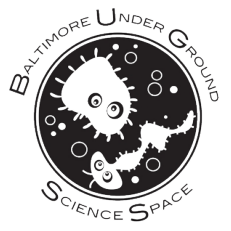

In [6]:
img = mpimg.imread('https://bugssonline.org/wp-content/themes/BUGS3/assets/images/bugsslogo-square300.png')
plt.axis('off')
imgplot = plt.imshow(img)

In [7]:
%matplotlib widget

In [8]:
clear_output()

ES_ = pd.read_pickle('ES.bugssData')
EB_ = pd.read_pickle('EB.bugssData')
W_ = pd.read_pickle('W.bugssData')
IS_ = pd.read_pickle('IS.bugssData')
IB_ = pd.read_pickle('IB.bugssData')

ES_['datetime']=ES_['DateTime']
EB_['datetime']=EB_['DateTime']
W_['datetime']=W_['DateTime']
IS_['datetime']=IS_['DateTime']
IB_['datetime']=IB_['DateTime']



ES=ES_.set_index('datetime')
EB=EB_.set_index('datetime')
W=W_.set_index('datetime')
IS=IS_.set_index('datetime')
IB=IB_.set_index('datetime')


In [9]:
# !jupyter nbextension enable --py widgetsnbextension --sys-prefix
# !jupyter serverextension enable voila --sys-prefix

In [10]:
def CleanList(LST,removeCommas,removeMore):
    listStr = str(LST)
    listStr = listStr.replace("'",'')
    if removeCommas==True:
        #listStr = listStr.replace(",,",',')
        listStr = listStr.replace(",, ",', ')
    listStr = listStr.replace('\\','')
    listStr = listStr.replace('/','')
    
    String = listStr[1:(len(listStr)-(1+removeMore))]
    #print(String)
    return(String)

In [108]:
def RawMovAvg(useRaw,useAvg,df,dp,dfref,methods,Window):
    if useRaw == True:
        df[dp]=dfref[dp]
    if useAvg == True:
        dffull = dfref[~dfref[dp].isna()]
        if 'Mean' in methods:
            df[dp+'_Mean']=dffull[dp].rolling(window = Window).mean()
            df[dp+'_Mean'] = df[dp+'_Mean'].shift(-int(Window/2))
        if 'Median' in methods:
            df[dp+'_Median']=dffull[dp].rolling(window = Window).median()
            df[dp+'_Median'] = df[dp+'_Median'].shift(-int(Window/2))
        if 'Max' in methods:
            df[dp+'_Max']=dffull[dp].rolling(window = Window).max()
            #df[dp+'_Max']=dffull[dp].rolling(window = Window).max()-dffull[dp].rolling(window = Window).mean()
            #df[dp+'_Max'] = df[dp+'_Max'].rolling(window = Window).mean() + dffull[dp].rolling(window = Window).mean()
            df[dp+'_Max'] = df[dp+'_Max'].shift(-int(Window/2))
        if 'Min' in methods:
            df[dp+'_Min']=dffull[dp].rolling(window = Window).min()
            df[dp+'_Min'] = df[dp+'_Min'].shift(-int(Window/2))
    return(df)


In [111]:
def TrimYR(dataset,year,months,DateColumn,Name):
    m1 = months[0].month
    m2 = months[1].month
    From = str(year)+'-'+str(m1)
    To = str(year)+'-'+str(m2)
    DStrim = dataset.loc[From:To]
    DStrim['Name'] = Name
    return DStrim
def prepDatasets(datasets,Years,Months):
    Dsets = []
    for ds in datasets:
        if ds == 'East Surface':
            df=ES
        elif ds == 'East Bottom':
            df=EB
        elif ds == 'West':
            df=W
        elif ds == 'Inversion Surface':
            df=IS
        elif ds == 'Inversion Bottom':
            df=IB
        for yr in Years:
            Dsets.append(TrimYR(df,yr,Months,'DateTime',ds+'-'+yr))
    return(Dsets)

def YPlot(datasets,DataPoints,Scale,Years,Months,Style,Transparency,fillb,rawavg,Window,methods):
    plt.style.use(Style)
    margin = .1
    RandYr='2020'#LEAP YEAR TO AVOID DATETIME ERRORS
    MaxOpac = .9
    prg1 = len(datasets)*len(Years)
    prg2 = len(DataPoints)
    prg3 = prg1*prg2+prg1
    prg4= prg1*(prg2+prg1)+prg1
    prg_part = 0
    prg = 0
    progress.max = prg3+1
    plt.style.use(Style)
#     fig, ax = plt.subplots()
    ax.grid(True, alpha=0.3)
    #fig.style.use(Style)
    
    useRaw  = (rawavg == 'Raw' or rawavg == 'Both')
    useAvg  = (rawavg == 'Moving Avg' or rawavg == 'Both')
    
    if Scale[0] == 2:
        plt.yscale('log')
    if Scale[1] == 2:
        plt.xscale('log')
    Dsets=prepDatasets(datasets,Years,Months)
    Lines = []
    desc = ''
    for ds in Dsets:
        DF_ref = pd.DataFrame(ds)
        name = DF_ref['Name']
        DF=pd.DataFrame({'DateTime':DF_ref.index})
        DF_ref['DTime']=RandYr+DF_ref['DateTime'].dt.strftime('-%m-%d %X')
        #DF_ref['DTime'] = RandYr+DF_ref['DTime']
        DF_ref['DTime'] = pd.to_datetime(DF_ref['DTime'],format='%Y-%m-%d %X')
#         DF_ref['DTime']=DF_ref['DateTime'].dt.strftime('%m-%d %X')
#         DF_ref['DTime'] = pd.to_datetime(DF_ref['DTime'],format='%m-%d %X')        
        DF_ref=DF_ref.set_index('DTime')

        DF['DTime']=DF['DateTime']
        DF['DTime']=RandYr+DF['DateTime'].dt.strftime('-%m-%d %X')
        #DF['DTime'] = RandYr+DF['DTime']
        DF['DTime'] = pd.to_datetime(DF['DTime'],format='%Y-%m-%d %X')
#         DF['DTime']=DF['DateTime'].dt.strftime('%m-%d %X')
#         DF['DTime'] = pd.to_datetime(DF['DTime'],format='%m-%d %X')
        DF=DF.set_index('DTime')
        df=DF.drop(columns = ['DateTime'])
        DF_ref=DF_ref.drop(columns = ['DateTime'])
        #print(DF_ref)
        for dp in DataPoints:
            df = RawMovAvg(useRaw,useAvg,df,dp,DF_ref,methods,Window)
            #print('\n\n',dp,'\n\n')
            #df[dp]=DF_ref[dp]
            #print(DF_ref)
            prg+=1
            progress.value = prg
        #    df.plot('DTime',dp)#,ax=ax, label = (DF['Name'][0]+'-'+dp))
        Desc = str(name[1])+'\n'+str(df.describe())+'\n\n'
        desc= desc + str(Desc)
        for key, val in df.iteritems():
            prg_part+=1
            prg+=1
            alp = MaxOpac-(Transparency*(prg_part-1))/prg3
            progress.value = prg
            l, = ax.plot(val.index, val.values,LineWidth = 1, label=(str(name[0])+' - '+str(key)),alpha=(alp))
            Lines.append(l)
            ax.fill_between(val.index,
                             val.values * 1-margin, val.values * 1+margin, 
                             color=l.get_color(), alpha=.4*alp*fillb)
            #mpld3.show()
    ax.legend()
    
    #return fig, ax, Lines,desc,htmlplot
    return desc

In [112]:
def DPlot(Datasets,DataPoints,Scale,StartDate,EndDate,Style,Transparency,fillb,rawavg,Window,methods):
    plt.style.use(Style)
    margin = .1
    prg1 = len(Datasets)
    prg2 = len(DataPoints)
    prg3 = prg1*prg2
    prg4= prg3*2
    prg_part = 0
    prg = 0
    MaxOpac = .9
    progress.max = prg3+1
    plt.style.use(Style)
    useRaw  = (rawavg == 'Raw' or rawavg == 'Both')
    useAvg  = (rawavg == 'Moving Avg' or rawavg == 'Both')
    
    #print(useRaw,'\n',useAvg)
#     try:
#         fig.clear
#     except:
#         fig, ax = plt.subplots()
    ax.grid(True, alpha=0.3)
    #fig.style.use(Style)
    #fig.figure(figsize= (figx,figy))
    #figsize= (figx,figy)
    #ure(figsize=(figx,figy))
    Lines = []
    desc = ''
    if Scale[0] == 2:
        plt.yscale('log')
    if Scale[1] == 2:
        plt.xscale('log')
    for ds in Datasets:
        if ds == 'East Surface':
            dfref=ES.loc[StartDate:EndDate]
        elif ds == 'East Bottom':
            dfref=EB.loc[StartDate:EndDate]
        elif ds == 'West':
            dfref=W.loc[StartDate:EndDate]
        elif ds == 'Inversion Surface':
            dfref=IS.loc[StartDate:EndDate]
        elif ds == 'Inversion Bottom':
            dfref=IB.loc[StartDate:EndDate]
        df=pd.DataFrame({'DateTime':dfref.index}).set_index('DateTime')
        for dp in DataPoints:
            df = RawMovAvg(useRaw,useAvg,df,dp,dfref,methods,Window)
            #df.plot('DateTime',dp,ax=ax, label = (ds, dp))#,alpha=(prg3-prg)/prg3)
            prg+=1
            progress.value = prg
        #print(df)
        Desc = str(ds)+'\n'+str(df.describe())+'\n\n'
        desc= desc + str(Desc)
        for key, val in df.iteritems():
            prg_part+=1
            prg+=1
            alp = MaxOpac-(Transparency*(prg_part-1))/prg3
            progress.value = prg
            l, = ax.plot(val.index, val.values,LineWidth = 1, label=(str(ds)+' - '+str(key)),alpha=(alp))
            Lines.append(l)
            ax.fill_between(val.index,
                             val.values * 1-margin, val.values * 1+margin, 
                             color=l.get_color(), alpha=.4*alp*fillb)

#     #print(interactive_legend)
#     print(ax.get_label())
#     fig.legend(ax.get_label)
#     mpld3.display()
#     print(out)
#     plt.savefig(extension)
#     img = Image.open(extension)
#     #img.show()
    #mpld3.show()
    ax.legend()
    #return fig, ax, Lines, desc, htmlplot
    return desc

In [113]:
def prepCompare(Dataset,datapoint):
    if Dataset == 'East Surface':
        Ds=ES[datapoint]
    elif Dataset == 'East Bottom':
        Ds=EB[datapoint]
    elif Dataset == 'West':
        Ds=W[datapoint]
    elif Dataset == 'Inversion Surface':
        Ds=IS[datapoint]
    elif Dataset == 'Inversion Bottom':
        Ds=IB[datapoint]
    NewCol = (str(datapoint)+' - '+str(Dataset))
    Ds = Ds.reset_index()
    Ds[NewCol]=Ds[datapoint]
    Ds=Ds.drop(columns=datapoint)
    return(Ds,NewCol)
def Compare(Dataset1,Dataset2,DataPoint1,DataPoint2,Colors,Scale,Style,ColorFormat,RegLine,alpha):
    #define palette 
    #print('GO')
    prg1 = 7
    prg=0
    progress.value = prg
    sns.set_palette(sns.color_palette(Colors))
    my_pal = sns.color_palette(Colors)
    cmap = ListedColormap(Colors[1:])
    Ds1, Col1 = prepCompare(Dataset1,DataPoint1)
    prg+=1
    progress.value = prg
    Ds2, Col2 = prepCompare(Dataset2,DataPoint2)
    prg+=1
    progress.value = prg
    Ds1 = Ds1[Ds1['datetime'].isin(Ds2['datetime'])]
    Ds2 = Ds2[Ds2['datetime'].isin(Ds1['datetime'])]
    Data = pd.merge(Ds1, Ds2, on='datetime', how='outer')
    prg+=1
    progress.value = prg
    plt.style.use(Style)
#     try:
#         fig.clear
#     except:
#         fig, ax = plt.subplots()
    ax.grid(True, alpha=0.3)
    #fig.style.use(Style)
    isYear=ColorFormat=='Year'
    isMonth=ColorFormat=='Month'
    isNone =ColorFormat=='None' 
    margin = .1
    MaxOpac = .9
    desc = ''
    Lines = []
    if Scale[0] == 2:
        plt.yscale('log')
    if Scale[1] == 2:
        plt.xscale('log')
    Data['Color'] = ((Data['datetime'].dt.year-2015)*isYear)+(Data['datetime'].dt.month*isMonth)
    Data['Size'] = ((Data['datetime'].dt.month)*isYear)+((Data['datetime'].dt.year-2015)*3*isMonth)+(1*isNone)
    #Data['Color'] = Colors[Data['Color']]
    #print(Data.head())
    prg+=1
    progress.value = prg
    Desc = str(Data.describe())
    xL = Col1
    yL = Col2
    try:
        ax.scatter(Data[xL],Data[yL],s = Data['Size'],
                   c=Data['Color'],cmap = cmap,alpha = alpha)#,alpha=1.0-((Transparency*Data['Color'])/5))
    except:
        xL = xL+'_x'
        yL = yL+'_y'
        ax.scatter(Data[xL],Data[yL],s = Data['Size'],
                   c=Data['Color'],cmap = cmap,alpha = alpha)#,alpha=1.0-((Transparency*Data['Color'])/5))
#     for key, val in Data.iteritems():
#             alp = 1
#             progress.value = prg
#             l, = ax.plot(val.index, val.values,LineWidth = 1, label=key,alpha=(alp))
#             Lines.append(l)
#             ax.fill_between(val.index,
#                              val.values * 1-margin, val.values * 1+margin, 
#                              color=l.get_color(), alpha=.4*alp*fillb)
    
    
    r2data = Data[((~Data[xL].isna())&(~Data[yL].isna()))]
    r2data = r2data.sort_values(by=[xL])
    stdata = r2data
    res = scipy.stats.linregress(r2data[xL],r2data[yL])
    #print(res)
    r2 = format(res.rvalue**2,'.6f')
    std_err = res.stderr
    #print(r2)
    desc= 'Correlation (r²): '+ r2 + '\n\n'+str(Desc)
    if RegLine == True:
        r2y = (res.intercept + res.slope*r2data[xL])
        s2y = (res.intercept + res.slope*stdata[xL])
        ax.plot(r2data[xL], r2y, c=Colors[0], label='Regression Line')
        #ax.fill_between(stdata[xL],s2y * (1-((100*std_err))),s2y * (1+((100*std_err))), 
        #                     color=Colors[0], alpha=.1)
        ax.legend()
    prg+=1
    progress.value = prg
    
    return desc, Col1,Col2
    

In [114]:
import ctypes  # An included library with Python install.
def Mbox(title, text, style):
    return ctypes.windll.user32.MessageBoxW(0, text, title, style)


envDatapoints = [('Salinity_ppt','Salinity_ppt'),('pH','pH'),
              ('DO_mg/L','DO_mg/L'),('Turb_NTU','Turb_NTU'),
              ('Chl_ug/L','Chl_ug/L'),('Temp_C','Temp_C')]

############# GENERAL #####################################################
Header = widgets.HTML(value=f'''<h1>&Dscr;&ascr;&tscr;&ascr;
                    &Pscr;&lscr;&oscr;&tscr;&tscr;&iscr;&nscr;&gscr; - &Vscr; {__Version__()}<h1>''',
                      color='lime',font_size=75)
figx=widgets.FloatSlider(
    value=8.0,
    min=2.0,
    max=25.0,
    step=0.1,
    description='X axis size:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)
figx.style.handle_color="lawngreen"

figy=widgets.FloatSlider(
    value=5.0,
    min=1.0,
    max=15.0,
    step=0.1,
    description='Y axis Size:',
    disabled=False,
    continuous_update=False,
    orientation='Vertical',
    readout=True,
    readout_format='.1f'
)
figy.style.handle_color="lawngreen"


btn_about = widgets.Button(
    description='About',
    tooltip='About',
    style={'button_color': 'lawngreen'},
    layout = Layout (width = '90%', height = '100%'),
    font_size=75
    #layout = Layout(width='98%', height='100%')
)
def aboutClick(event):
    Mbox('About',
     f'''An interface to manipulate and visualize the data\n''', 0)

    
btn_about.on_click(aboutClick)

Scale = widgets.Dropdown(
    options=[('linear', 1), ('logarithmic', 2)],
    value=1,
    description='Y Scale',
)

xScale = widgets.Dropdown(
    options=[('linear', 1), ('logarithmic', 2)],
    value=1,
    description='X Scale',
)


Style = widgets.Dropdown(
    options=[('default', 'default'), ('classic', 'classic'),
             ('Solarize_Light2', 'Solarize_Light2'),('_classic_test_patch','_classic_test_patch'),
             ('bmh', 'bmh'),('dark_background', 'dark_background'),
             ('fast', 'fast'),('fivethirtyeight', 'fivethirtyeight'),
             ('ggplot', 'ggplot'),('grayscale', 'grayscale'),
             ('seaborn-colorblind', 'seaborn-colorblind'),('seaborn-dark', 'seaborn-dark'),
             ('seaborn-dark-palette', 'seaborn-dark-palette'),('seaborn-darkgrid', 'seaborn-darkgrid'),
             ('seaborn-deep', 'seaborn-deep'),('seaborn-muted', 'seaborn-muted'),
             ('seaborn-notebook', 'seaborn-notebook'),('seaborn-paper', 'seaborn-paper'),
             ('seaborn-pastel', 'seaborn-pastel'),('seaborn-poster', 'seaborn-poster'),
             ('seaborn-talk', 'seaborn-talk'),('seaborn-white', 'seaborn-white'),
             ('seaborn-whitegrid', 'seaborn-whitegrid'),('seaborn-colorblind10', 'seaborn-colorblind10')],
    value='default',
    description='Style',
)

DataToInclude = widgets.SelectMultiple(
    options=['East Surface', 'East Bottom', 'West','Inversion Surface','Inversion Bottom'],
    value=['East Surface'],
    description='Datasets',
    rows = 5,
    disabled=False
)


Transparency = widgets.Checkbox(
    value=False,
    description='Gradual Transparency',
    disabled=False
)

fillb = widgets.Checkbox(
    value=False,
    description='Fill Between',
    disabled=False
)

viewer = widgets.Checkbox(
    value=False,
    description='Viewer',
    disabled=True
)

useSpecial = widgets.Checkbox(
    value=False,
    description='Use Special:',
    disabled=False
)

Special = widgets.ToggleButtons(
    options=['Legend', 'Highlight'],
    description='Special:',
    disabled=True,
    button_style = 'success',
    tooltips=['Interactive Legend','Highlight'],
)

Special.style.button_color = 'lawngreen'

def specialUpdate(change):
    if useSpecial.value == True:
        viewer.value = True
        Special.disabled = False
    else:
        Special.disabled = True       
def viewerUpdate(change):
    if viewer.value == False:
        useSpecial.value = False
        Special.disabled = True       
useSpecial.observe(specialUpdate, names='value')
viewer.observe(viewerUpdate, names='value')

vbox_General = widgets.VBox([viewer,Transparency,fillb])
vbox_Special = widgets.VBox([useSpecial,Special])

useSpecial.disabled = True
Special.disabled = True

Fmt = widgets.Tab()
Fmt.children = [vbox_General,vbox_Special]
Fmt.set_title(0,'General')
Fmt.set_title(1,'Special')

vbox_g = widgets.VBox([Style,Scale,xScale,DataToInclude,Fmt,figx])
vbox_g1 = widgets.VBox([figy]) #,btn_about
hbox_g = widgets.HBox([vbox_g1,vbox_g])
vbox_general = widgets.VBox([Header,hbox_g])
############################################################################


#################### ENVIRONMENT ###########################################
EnvDataPoints = widgets.SelectMultiple(
    options=['Salinity_ppt', 'pH', 'DO_mg/L','Turb_NTU','Chl_ug/L','Temp_C'],
    value=['pH'],
    rows=6,
    description='Data',
    disabled=False
)

RawAvg = widgets.Dropdown(
    options=['Raw','Moving Avg','Both'],
    value='Raw',
    description='Advanced'
)

AvgWindow = widgets.IntSlider(
    value=250,
    min = 1,
    max=500,
    step=1,
    description='Window',
    disabled=True,
    continuous_update=False,
    readout=True,
    readout_format = '.0f'
)
def WinChange(change):
    AvgWindow.max = AvgWindow.value*3+(1-(AvgWindow.value^0))
AvgWindow.observe(WinChange, names='value')

MovingCond =  widgets.SelectMultiple(
    options=['Mean','Median','Min','Max'],
    value=['Mean'],
    rows=4,
    description='Moving Avg',
    disabled=True
)


StartDate = widgets.DatePicker(description='Start Date')

EndDate = widgets.DatePicker(description='End Date')

dates = [datetime.date(2018,i,1) for i in range(1,13)]
options = [(i.strftime('%b'), i) for i in dates]
Months = widgets.SelectionRangeSlider(
    options=options,
    index=(0,11),
    description='Months',
    disabled=False
)


Years=widgets.SelectMultiple(
    options=['2016','2017','2018', '2019', '2020'],
    value=['2016','2017','2018', '2019', '2020'],
    description='Years',
    rows = 5,
    disabled=False
)

def RawAvgChange(event):
    if RawAvg.value == 'Raw':
        AvgWindow.disabled = True
        MovingCond.disabled = True
    else:
        AvgWindow.disabled = False
        MovingCond.disabled = False

RawAvg.observe(RawAvgChange, names = 'value')



vbox_dateselecter =  widgets.VBox([StartDate,EndDate])

vbox_yearlimiter =  widgets.VBox([Months,Years])

DRtab = widgets.Tab()
DRtab.children = [vbox_dateselecter,vbox_yearlimiter]
DRtab.set_title(0,'Date Range')
DRtab.set_title(1,'Years Overlayed')

vbox_EnvData = widgets.VBox([EnvDataPoints,RawAvg,AvgWindow,MovingCond,DRtab])
############################################################################


############## SPECIES #####################################################
species = ['Amphipod','Barnacle','Clam Worm','Colonial Ciliates','Copepod',
             'Dark False Mussel','Dusky Sea Slug','Hydra','Magnification',
             'Mud Crab','Oyster Flatworm','Stentor','Tube Bryzoan','Whip Mudworm']
SpecDataPoints = widgets.SelectMultiple(
    options=species,
    value=['Hydra'],
    rows=14,
    description='Data',
    disabled=True
)

specStartDate = widgets.DatePicker(description='Start Date',disabled = True)

specEndDate = widgets.DatePicker(description='End Date',disabled = True)


specMonths = widgets.SelectionRangeSlider(
    options=options,
    index=(0,11),
    description='Months',
    disabled=True
)


specYears=widgets.SelectMultiple(
    options=['2016','2017','2018', '2019', '2020'],
    value=['2016','2017','2018', '2019', '2020'],
    description='Years',
    rows = 5,
    disabled=True
)

vbox_specdateselecter =  widgets.VBox([specStartDate,specEndDate])

vbox_specyearlimiter =  widgets.VBox([specMonths,specYears])

specDRtab = widgets.Tab()
specDRtab.children = [vbox_specdateselecter,vbox_specyearlimiter]
specDRtab.set_title(0,'Date Range')
specDRtab.set_title(1,'Years Overlayed')


vbox_SpecData =  widgets.VBox([SpecDataPoints,specDRtab])
############################################################################


############## CORRELATION #################################################
cd2Iopt = {'East Surface','East Bottom','West','Inversion Surface','Inversion Bottom'}

alpha=widgets.FloatSlider(
    value=1.0,
    min=0.01,
    max=1.0,
    step=0.01,
    description='Opacity:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f'
)

corrDataToInclude1 = widgets.Dropdown(
    options=cd2Iopt,
    value='East Surface',
    description='Dataset',
    disabled=False
)

corrDataToInclude2 = widgets.Dropdown(
    options=cd2Iopt,
    value='East Surface',
    description='Dataset'
)
EnvC1DataPoints = widgets.Dropdown(
    options=envDatapoints,
    value='pH',
    description='Data'
)

EnvC2DataPoints = widgets.Dropdown(
    options=envDatapoints,
    value='pH',
    description='Data'
)
vbox_corr1 = widgets.VBox([EnvC1DataPoints,corrDataToInclude1])
vbox_corr2 = widgets.VBox([EnvC2DataPoints,corrDataToInclude2])
accordion = widgets.Accordion(children=[vbox_corr1,vbox_corr2])
accordion.set_title(0, 'First Condition')
accordion.set_title(1, 'Second Condition')

SpecCDataPoints = widgets.Select(
    options=species,
    description='Data',
    orientation='Vertical',
    disabled = True
)

EnvCDataPoints = widgets.SelectMultiple(
    options=['Salinity_ppt', 'pH', 'DO_mg/L','Turb_NTU','Chl_ug/L','Temp_C'],
    value=['pH'],
    rows=6,
    description='Correlate to:',
    disabled=True,
    max = 3
)
method = widgets.Dropdown(
    options={'Top': 0, 'Bottom': 1},
    value=0,
    description='',
    disabled = True,
    layout = Layout (width = '25%', height = '100%')
)
ResultNum=widgets.IntSlider(
    value=3,
    min=1,
    max=len(EnvCDataPoints.value),
    step=1,
    description='',
    disabled=True,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
ResultNum.style.handle_color="lawngreen"

Colorform = widgets.Dropdown(
    options=['Year','Month','None'],
    description='Colorcode by',
    disabled=False
)

colorconcise = False

Color16 = widgets.ColorPicker(
    concise=colorconcise,
    description='2016 color',
    value='#00ffff',
    disabled=False
    
)
Color17 = widgets.ColorPicker(
    concise=colorconcise,
    description='2017 color',
    value='#0000ff',
    disabled=False
    
)
Color18 = widgets.ColorPicker(
    concise=colorconcise,
    description='2018 color',
    value='#00ff00',
    disabled=False
    
)
Color19 = widgets.ColorPicker(
    concise=colorconcise,
    description='2019 color',
    value='#00aa00',
    disabled=False
    
)
Color20 = widgets.ColorPicker(
    concise=colorconcise,
    description='2020 color',
    value='#ffff00',
    disabled=False
    
)

ColorJun = widgets.ColorPicker(concise=colorconcise, description='June color',
                               value='#c8c800', disabled=True)

ColorJul = widgets.ColorPicker(concise=colorconcise, description='July color',
                               value='#ff9600', disabled=True)

ColorAug = widgets.ColorPicker(concise=colorconcise, description='August color',
                               value='#966400', disabled=True)

ColorSept = widgets.ColorPicker(concise=colorconcise, description='September color',
                               value='#ff0000', disabled=True)

ColorOct = widgets.ColorPicker(concise=colorconcise, description='October color',
                               value='#960000', disabled=True)

ColorNov = widgets.ColorPicker(concise=colorconcise, description='November color',
                               value='#ff00ff', disabled=True)

ColorDec = widgets.ColorPicker(concise=colorconcise, description='December color',
                               value='#960096', disabled=True)

RegColor = widgets.ColorPicker(concise=colorconcise, description='Regression line color',
                               value='#000000', disabled=False)

mColors = [ColorJun,ColorJul,ColorAug,ColorSept,ColorOct,ColorNov,ColorDec]

def clrUpdate(event):
    if Colorform.value=='Month':
        for o in mColors:
            o.disabled = False
        Color17.disabled = False
        Color18.disabled = False
        Color19.disabled = False
        Color20.disabled = False
        Color16.description = 'January color'
        Color17.description = 'February color'
        Color18.description = 'March color'
        Color19.description = 'April color'
        Color20.description = 'May color'
    elif Colorform.value=='Year':
        for o in mColors:
            o.disabled = True
        Color17.disabled = False
        Color18.disabled = False
        Color19.disabled = False
        Color20.disabled = False
        Color16.description = '2016 color'
        Color17.description = '2017 color'
        Color18.description = '2018 color'
        Color19.description = '2019 color'
        Color20.description = '2020 color'
    else:
        for o in mColors:
            o.disabled = True
        Color16.description = 'Solid color'
        Color17.disabled = True
        Color18.disabled = True
        Color19.disabled = True
        Color20.disabled = True
Colorform.observe(clrUpdate, names='value')

Palette_V=widgets.VBox([Color16,Color17,Color18,Color19,Color20,ColorJun])
Palette_V2=widgets.VBox([ColorJul,ColorAug,ColorSept,ColorOct,ColorNov,ColorDec])
Palette=widgets.VBox([Palette_V,Palette_V2])

showReg = widgets.Checkbox(
    value=True,
    description='Show regression line',
    disabled=False
)


def RegressionUpdate(event):
    if showReg.value == False:
        RegColor.disabled = True
    else:
        RegColor.disabled = False
showReg.observe(RegressionUpdate, names='value')

def AdjMax(change):
    ResultNum.max=len(EnvCDataPoints.value)

EnvCDataPoints.observe(AdjMax, names='value')

vbox_env_env =  widgets.VBox([accordion,showReg,RegColor,alpha,Colorform,Palette])
hbox_env_spec_sub = widgets.HBox([method,ResultNum])
vbox_env_spec =  widgets.VBox([SpecCDataPoints,EnvCDataPoints,hbox_env_spec_sub])

CorrTab = widgets.Tab()

CorrTab.children = [vbox_env_env,vbox_env_spec]
#CorrTab.disabled = [False,True]
CorrTab.set_title(0,'Environmental Correlation')
CorrTab.set_title(1,'Species Correlation')

vbox_Corr =  widgets.VBox([CorrTab])

def updateCorr(event):
    if MainTab.selected_index == 2:
        DataToInclude.disabled = True
    else:
        DataToInclude.disabled = False

        
############################################################################


############## MAIN ########################################################

MainTab = widgets.Tab()

MainTab.children = [vbox_EnvData,vbox_SpecData,vbox_Corr]

MainTab.set_title(0,'Environmental')
MainTab.set_title(1,'Species')
MainTab.set_title(2,'Correlation')
MainTab.layout = Layout (width = '500px', height = '100%')
vbox_main = widgets.VBox([MainTab])

MainTab.observe(updateCorr, names='selected_index')


###########################################################################


############ DISPLAY ######################################################
clear_output()
   
progress =  widgets.IntProgress(
    value=0,
    min=0,
    max=2,
    step=1,
    description='plotting:',
    style = {'bar_color':'lawngreen'},
    orientation='horizontal'
    )

btn_plt = widgets.Button(
    description='''Plot 📈''',
    tooltip='Plot',
    style={'button_color': 'lawngreen'},
    layout = Layout (width = '360px', height = '100%'),
    font_size=75
    #layout = Layout(width='98%', height='100%')
)

btn_clear = widgets.Button(
    description='''Clear Plot space''',
    tooltip='Clear',
    style={'button_color': 'lawngreen'},
    layout = Layout (width = '360px', height = '100%'),
    font_size=75
    #layout = Layout(width='98%', height='100%')
)


Output = widgets.Output(layout = {
    'border': '1px solid black',
    # 'width': '100%' # Not needed and does not help
})

Out2 = widgets.Output(layout = {
    'border': '1px solid lawngreen',
    # 'width': '100%' # Not needed and does not help
})

with Output:
    fig, ax = plt.subplots(1, constrained_layout=True)
    fig.set_figwidth(figx.value)
    fig.set_figheight(figy.value)
    fig.canvas.layout.border = '1px solid lawngreen'
    ax.axis('on')
    grid();
    


def Clrplot(event):
    plt.cla() # Clearing the ax
    grid();

def Masterplot(event):
    with Out2:
        clear_output()
        print('Running...')
    plt.style.use(Style.value)
    Clrplot(event) # Clearing the ax
    if MainTab.selected_index==0:
        if DRtab.selected_index == 0:
            desc = DPlot(DataToInclude.value,EnvDataPoints.value,
                         [Scale.value,xScale.value],StartDate.value,EndDate.value,
                         Style.value,Transparency.value,fillb.value,
                         RawAvg.value,int(AvgWindow.value),MovingCond.value)
            #myplot=widgets.HTML(value=plot)
            #mpld3.display()
        else:
            desc = YPlot(DataToInclude.value,EnvDataPoints.value,
                         [Scale.value,xScale.value],Years.value,Months.value,
                         Style.value,Transparency.value,fillb.value,
                         RawAvg.value,int(AvgWindow.value),MovingCond.value)
    #         YPlot(DataToInclude.value,EnvDataPoints.value,
    #               Scale.value,Years.value,Months.value,
    #               figx.value,figy.value,Style.value)
        ax.set_xlabel('Time')
        ax.set_ylabel('Value')

    elif MainTab.selected_index==2:
        Colors = [RegColor.value,Color16.value]
        if Colorform.value=='Year':
            Colors = [RegColor.value,Color16.value,Color17.value,Color18.value,Color19.value,Color20.value]
        elif Colorform.value=='Month':
            Colors = [RegColor.value,Color16.value,Color17.value,Color18.value,Color19.value,Color20.value,ColorJun.value,
                  ColorJul.value,ColorAug.value,ColorSept.value,ColorOct.value,ColorNov.value,ColorDec.value]
        desc,xL,yL = Compare(corrDataToInclude1.value,corrDataToInclude2.value,EnvC1DataPoints.value,
                EnvC2DataPoints.value,Colors,[Scale.value,xScale.value],Style.value,Colorform.value,showReg.value, alpha.value)
        ax.set_xlabel(xL)
        ax.set_ylabel(yL)
    
    ax.set_title('Plot', size=20)

    with Out2:
        clear_output()
        print('Data Analysis:\n\n'+desc)
    progress.value = progress.max
    time.sleep(.1)
    progress.value = 0
    
    
def Plotter(figx,figy):
    with Output:
        fig.set_figwidth(figx)
        fig.set_figheight(figy)
        btn_plt.on_click(Masterplot)
        btn_clear.on_click(Clrplot)
    
def clickEvent(event):
    iplot.update()

iplot = widgets.interactive(Plotter,figx=figx,figy=figy)

btn_plt.on_click(clickEvent)
btn_clear.on_click(clickEvent)



Plot = HTML('')
vbox_result = widgets.VBox([progress,btn_plt,btn_clear])
vbox_Setup = widgets.VBox([vbox_general,vbox_result])
hbox_Setup = widgets.HBox([vbox_Setup,vbox_main])
vbox_Final = widgets.VBox([hbox_Setup,Output,Out2])


In [115]:
#page = widgets.HBox([vbox_Setup])
page = vbox_Final
#For Debugging
# sc  = Sidecar(title = 'Interface - Viewer')
# with sc:
#     display(page)
# #End Debugger
display(page)
#display(fig)